In [1]:
import pandas as pd
import numpy as np
import json
import datetime

In [2]:
df = pd.read_json('Matt/data.json')
df.head()

,filename,labels,boxes,img_height,img_width
0,All/FILE2191_02.mp4/FILE2191_02.mp4_00991.jpg,"[vehicle, pedestrian, scooter, vehicle, vehicl...","[[0, 578, 313, 991], [717, 339, 739, 394], [20...",1080,1920
1,All/FILE2191_02.mp4/FILE2191_02.mp4_00577.jpg,"[scooter, vehicle, vehicle, vehicle, vehicle, ...","[[1679, 569, 1859, 870], [0, 578, 313, 991], [...",1080,1920
2,All/FILE2191_02.mp4/FILE2191_02.mp4_00088.jpg,"[scooter, vehicle, pedestrian, vehicle, vehicl...","[[195, 614, 269, 671], [0, 578, 313, 991], [10...",1080,1920
3,All/FILE2191_02.mp4/FILE2191_02.mp4_00815.jpg,"[vehicle, pedestrian, vehicle, vehicle, vehicl...","[[0, 578, 313, 991], [419, 349, 441, 403], [13...",1080,1920
4,All/FILE2191_02.mp4/FILE2191_02.mp4_01277.jpg,"[vehicle, pedestrian, vehicle, vehicle, pedest...","[[0, 578, 313, 991], [1228, 347, 1249, 401], [...",1080,1920


In [3]:
info = {
    "description":"This is 1.0 version of the AIDEA competition dataset in COCO format create by Team MAKOBY.",
    "url":"https://aidea-web.tw/",
    "version":"1.0",
    "year":2020,
    "contributor":"MHTsai, member of MAKOBY.",
    "date_created": datetime.datetime(2021, 2, 21),
}

licenses = [{
    "id":1,    
    "name":"Free License",
    "url":"https://aidea-web.tw/topic/35e0ddb9-d54b-40b7-b445-67d627890454",
}]

image_proto = {
    "file_name":"COCO_val2014_000000391895.jpg",
    "id":391895,
    "license":1,
    "height":1080,
    "width":1920,
    "flickr_url":"",
    "coco_url":"",
    "date_captured": datetime.datetime(2021, 2, 21),
}

annotation_proto = {
    "id": int,
    "image_id": int,
    "category_id": int,
    "area": float,
    "bbox": "[x,y,width,height]",
    "iscrowd": 0,
    "segmentation": [],
}

category_proto = {
    "id": int,
    "name": str,
    "supercategory": "AIDEA",
}

In [4]:
## category
label = ['vehicle','pedestrian','scooter','bicycle']
label_dict = {
    'vehicle': 1,
    'pedestrian': 2,
    'scooter': 3,
    'bicycle': 4,
}

categories = list()
for idx in range(1,5):
    category = category_proto.copy()
    category['id'] = idx
    category['name'] = label[idx-1]
    categories.append(category)
print(categories)

[{'id': 1, 'name': 'vehicle', 'supercategory': 'AIDEA'}, {'id': 2, 'name': 'pedestrian', 'supercategory': 'AIDEA'}, {'id': 3, 'name': 'scooter', 'supercategory': 'AIDEA'}, {'id': 4, 'name': 'bicycle', 'supercategory': 'AIDEA'}]


In [5]:
## annotations and images
images, annotations = list(), list()
image_id = 1
annotation_id = 1

for index, row in df.iterrows():
    # for image 
    image = image_proto.copy()
    image['file_name'] = row['filename']
    image['id'] = image_id
    
    
    # for annotation
    VOC_bboxes = np.array(df.iloc[index]['boxes']).astype(np.float)
    bboxes = list(map(lambda s: [s[0],s[1],s[2]-s[0],s[3]-s[1]] , VOC_bboxes))
    labels = list(map(lambda s: label_dict[s], df.iloc[index]['labels']))
    for bbox, label in zip(bboxes,labels):
        annotation = annotation_proto.copy()
        annotation['bbox'] = bbox
        annotation['category_id'] = label
        annotation['area'] = bbox[2]*bbox[3]
        annotation['id'] = annotation_id
        annotation['image_id'] = image_id
        annotation_id = annotation_id + 1
        annotations.append(annotation)
    
    image_id = image_id + 1
    images.append(image)

In [6]:
## final
AIDEA_COCO = {
    "info": info,
    "liceses": licenses,
    "categories": categories,
    "images": images,
    "annotations": annotations
}

def myconverter(o):
    if isinstance(o, datetime.datetime):
        return o.__str__()

with open('./Matt/COCO_data.json', 'w') as fp:
    json.dump(AIDEA_COCO, fp, default = myconverter)

## coco api

In [20]:
from pycocotools.coco import COCO
import random
import skimage.io as io
import matplotlib.pyplot as plt

In [8]:
coco=COCO('./Matt/COCO_data.json')

loading annotations into memory...
Done (t=3.63s)
creating index...
index created!


In [9]:

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
vehicle pedestrian scooter bicycle

COCO supercategories: 
AIDEA


In [35]:
catIds = coco.getCatIds(catNms=['pedestrian']);
imgIds = coco.getImgIds(catIds=catIds);
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
AnnIds = coco.getAnnIds(imgIds = img['id'])
annot = coco.loadAnns(AnnIds)

In [36]:
img

{'file_name': 'All/Fog_02_03.mp4/Fog_02_03.mp4_00246.jpg',
 'id': 59093,
 'license': 1,
 'height': 1080,
 'width': 1920,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': '2021-02-21 00:00:00'}

In [37]:
annot

[{'id': 509795,
  'image_id': 59093,
  'category_id': 2,
  'area': 9636.0,
  'bbox': [484.0, 607.0, 73.0, 132.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 509796,
  'image_id': 59093,
  'category_id': 2,
  'area': 11937.0,
  'bbox': [344.0, 631.0, 69.0, 173.0],
  'iscrowd': 0,
  'segmentation': []},
 {'id': 509797,
  'image_id': 59093,
  'category_id': 1,
  'area': 178488.0,
  'bbox': [0.0, 631.0, 444.0, 402.0],
  'iscrowd': 0,
  'segmentation': []}]

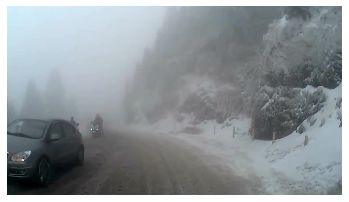

In [38]:
I = io.imread('./ivslab_train/JPEGImages/'+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [30]:
catIds

[3, 4]

In [40]:
import torchvision.datasets as dset
import torchvision.transforms as trns

# create mscoco detection train dataset
det_train = dset.CocoDetection(root='./ivslab_train/JPEGImages/',
                               annFile='./Matt/COCO_data.json',
                               transform=trns.ToTensor())

loading annotations into memory...
Done (t=2.66s)
creating index...
index created!


In [41]:
det_train

Dataset CocoDetection
    Number of datapoints: 89002
    Root location: ./ivslab_train/JPEGImages/
    StandardTransform
Transform: ToTensor()